Creating Matches
----------------

One of the capabilities of the library is to create a match between two players. Players are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html

For now we are going to use two very simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example lets create a 5 turns match between `Cooperator()` and `Random()`. 

In [1]:
import axelrod as axl

/home/nightwing/anaconda3/envs/axelrod/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nightwing/anaconda3/envs/axelrod/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, 5)
results = match.play()
results

[('C', 'D'), ('C', 'D'), ('C', 'D'), ('C', 'C'), ('C', 'D')]

We can also obtain the score of the match.

In [7]:
scores = match.scores()
scores

[(0, 5), (0, 5), (0, 5), (3, 3), (0, 5)]

and various other measures.

In [8]:
match.final_score()

(3, 23)

In [9]:
match.final_score_per_turn()

(0.6, 4.6)

In [10]:
match.winner()

Random: 0.5

In [13]:
match.cooperation()  # The count of cooperations

(5, 1)

In [12]:
match.normalised_cooperation() 

(1.0, 0.2)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy play against all opponents and the strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. **Note:** * http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html has the list and the explanation of each strategy*.

In [17]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [25]:
tournament = axl.Tournament(players)
tournament.turns # default value of turns

200

In [27]:
results = tournament.play()
winners = results.ranked_names
winners

['Alternator',
 'Defector',
 'Random: 0.5',
 'Tit For Tat',
 'Grumpy',
 'Cooperator']

In [28]:
scores = results.scores
scores

[[1773, 1797, 1836, 1761, 1821, 1773, 1800, 1785, 1806, 1809],
 [2612, 2696, 2644, 2604, 2672, 2652, 2636, 2656, 2644, 2608],
 [2643, 2323, 2570, 2641, 2586, 2468, 2602, 2135, 2583, 2579],
 [2360, 2328, 2343, 2354, 2355, 2336, 2366, 2347, 2334, 2339],
 [1983, 2117, 1995, 1989, 2016, 2050, 2004, 2166, 1995, 2004],
 [2657, 2602, 2644, 2665, 2614, 2649, 2673, 2648, 2641, 2681]]

We can also plot the results.

In [30]:
%matplotlib inline

/home/nightwing/anaconda3/envs/axelrod/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


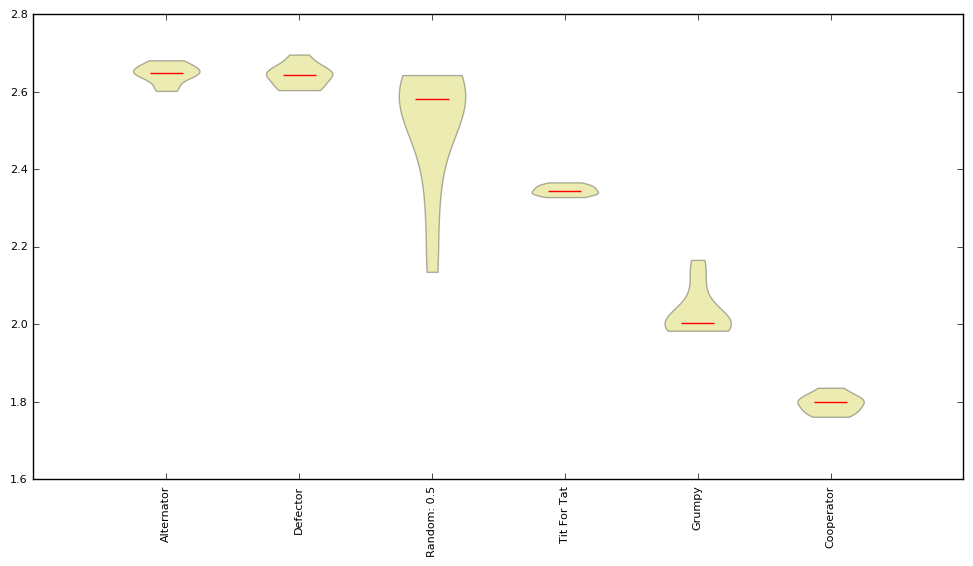

In [31]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

EXERCISE
--------

Create your own tournament using any five players from the library.

Futhermore, look at the ranked names and plot the scores.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at what is called the human strategy.